# Taylor Swift Spotify Stream Count
---

**Tutorial Group:** FCS 3
**Team:** 9

### Importing Necessary Libraries

> **Core Libraries**
> - **pandas**: Manages and manipulates tabular data.
> - **numpy**: Handles numerical operations on arrays and matrices.

> **Visualization Libraries**
> - **matplotlib.pyplot & seaborn**: Create static, animated, and interactive visualizations to analyze data and model outputs.

> **Machine Learning Libraries**
> - **sklearn.model_selection**
>   - **train_test_split**: Splits datasets into training and testing sets for model evaluation.
> - **sklearn.ensemble**
>   - **RandomForestRegressor**: Predicts continuous variables using an ensemble of decision trees.
> - **sklearn.metrics**
>   - **mean_squared_error, mean_absolute_error**: Assess model performance through error metrics.
> - **xgboost**
>   - **XGBoost Regression Model**: XGBoost excels in predictive tasks due to its efficient gradient boosting framework and handling of sparse data.

> **Utility Libraries**
> - **warnings**
>   - **filterwarnings('ignore')**: Suppresses warnings to clean output. Should be used judiciously to not miss critical issues.

> **Purpose**: These libraries facilitate the entire workflow from data loading and preparation to exploratory data analysis and building predictive models, culminating in actionable insights.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Install xgboost

In [5]:
!pip install xgboost

### Data Set

1. 1st data set is from `kaggle .com` and contains `Taylor Swift's spotify songs` features and details.

The elements of the data set are:
| Index | Elements           | Description                                                                                                                                                         |
|-------|:-------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1     | **Index**         | Index of the song within the dataset.                                                                                                                               |
| 2     | **Name**          | The name of the song.                                                                                                                                               |
| 3     | **Album**         | The name of the album to which the song belongs.                                                                                                                    |
| 4     | **Release Date**  | The date (day, month, year) when the album was released.                                                                                                            |
| 5     | **Track Number**  | The order in which the song appears on the album.                                                                                                                   |
| 6     | **ID**            | The Spotify ID for the song.                                                                                                                                        |
| 7     | **URI**           | The Spotify URI for the song.                                                                                                                                       |
| 8     | **Acousticness**  | A confidence measure from 0.0 to 1.0 of whether the track is acoustic.                                                                                              |
| 9     | **Danceability**  | Describes how suitable a track is for dancing based on various musical elements. Ranges from 0.0 (least danceable) to 1.0 (most danceable).                        |
| 10    | **Energy**        | Represents the intensity and activity of a track from 0.0 to 1.0.                                                                                                   |
| 11    | **Instrumentalness** | Predicts whether a track contains no vocals, ranging from 0.0 to 1.0.                                                                                               |
| 12    | **Liveness**      | Detects the presence of an audience in the recording, with values above 0.8 indicating a strong likelihood of a live performance.                                    |
| 13    | **Loudness**      | The overall loudness of a track in decibels (dB), typically ranging from -60 to 0 dB.                                                                               |
| 14    | **Speechiness**   | Indicates the presence of spoken words in a track, with values above 0.66 suggesting spoken-word content.                                                           |
| 15    | **Tempo**         | The estimated tempo of a track in beats per minute (BPM).                                                                                                           |
| 16    | **Valence**       | Describes the musical positiveness conveyed by a track, ranging from 0.0 (negative) to 1.0 (positive).                                                             |
| 17    | **Popularity**    | The popularity of the song on Spotify, ranging from 0 to 100.                                                                                                       |
| 18    | **Duration (ms)** | The duration of the track in milliseconds.                                                                                                                          |

2. 2nd data set is from `kworb .net` and contains `Taylor Swift's spotify songs` stream counts.

The elements of the data set are:
| Index | Elements           | Description                                                                                                                                                         |
|-------|:-------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1     | **Song Title**         | The name of the song.                                                                                                                               |
| 2     | **Streams**          | The total streams of the song on spotify.                                                                                                                     |
| 3     | **Daily**         | The daily streams of the song on spotify                                                                                                                     |

### Import data sets

In [6]:
df1 = pd.read_csv('taylor_swift_spotify.csv') # source 1
df1.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,66,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,67,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,68,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,67,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,65,193289


In [7]:
df2 = pd.read_html('https://kworb.net/spotify/artist/06HL4z0CvFAxyc27GXpf02_songs.html') # source 2
print("Data type : ", type(df2))
print("HTML tables : ", len(df2))
df2[1].head()

Data type :  <class 'list'>
HTML tables :  2


,Song Title,Streams,Daily
0,Cruel Summer,2033760246,3298773
1,Blank Space,1788911127,808955
2,* I Don’t Wanna Live Forever (Fifty Shades Dar...,1632780371,720102
3,Anti-Hero,1513361419,1110814
4,Shake It Off,1375526556,680341


### Merge two sources together

- based on their song name

In [8]:
# Rename the 'Song Title' column in df2 to 'name'
df2[1] = df2[1].rename(columns={'Song Title': 'name','Streams': 'stream_count','Daily': 'daily'})

# Combine the two dataframes
df = pd.merge(df1, df2[1], on='name')

df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,stream_count,daily
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,66,212600,104819286,177137
1,22,Welcome To New York (Taylor's Version),1989 (Taylor's Version),2023-10-26,1,1hR8BSuEqPCCZfv93zzzz9,spotify:track:1hR8BSuEqPCCZfv93zzzz9,0.009610,0.761,0.607,0.000022,0.3670,-4.830,0.0312,116.980,0.674,77,212600,104819286,177137
2,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,67,231833,155996658,353082
3,23,Blank Space (Taylor's Version),1989 (Taylor's Version),2023-10-26,2,45wMBGri1PORPjM9PwFfrS,spotify:track:45wMBGri1PORPjM9PwFfrS,0.097600,0.737,0.725,0.000000,0.1740,-5.417,0.0641,96.012,0.755,81,231833,155996658,353082
4,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,68,231000,188126672,433296


### Dataset Information
This cell provides detailed information about the dataset using the info() method. It displays the column names, non-null counts, and data types, which helps identify missing values and assess data quality.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        532 non-null    int64  
 1   name              532 non-null    object 
 2   album             532 non-null    object 
 3   release_date      532 non-null    object 
 4   track_number      532 non-null    int64  
 5   id                532 non-null    object 
 6   uri               532 non-null    object 
 7   acousticness      532 non-null    float64
 8   danceability      532 non-null    float64
 9   energy            532 non-null    float64
 10  instrumentalness  532 non-null    float64
 11  liveness          532 non-null    float64
 12  loudness          532 non-null    float64
 13  speechiness       532 non-null    float64
 14  tempo             532 non-null    float64
 15  valence           532 non-null    float64
 16  popularity        532 non-null    int64  
 1

# Data Preparation and Problem Formulation
---

We aim to predict the total stream count for Taylor Swift's songs on Spotify. To enhance our prediction accuracy, we are optimizing our dataset by merging similar features and excluding those less relevant to stream counts. This streamlined approach will improve the effectiveness of our predictive model.

### Create New Data Columns to Assist the Project

To better capture the dynamics influencing streaming numbers, we are introducing two composite features and additional date-based features:

**mood_score**
Combines `valence`, `energy`, and `tempo` to represent the song's overall mood. This metric helps gauge a song's emotional and energetic appeal, which may correlate with its streaming potential. It is calculated as the average of three components—Valence, Energy, and Tempo. The formula is given by:

$$
\text{mood_score} = \frac{\text{valence} + \text{energy} + \text{tempo}}{3}
$$


**rhythm_index**
Merges `danceability` and `tempo` to assess the rhythmic appeal of a song. This index is particularly useful for identifying tracks that may be favored in various listening scenarios. It is calculated as the average of Danceability and Tempo. The formula is given by:

$$
\text{rhythm_index} = \frac{\text{danceability} + \text{tempo}}{2}
$$


**Date Features**
We will enhance our dataset by splitting the `release_date` into day, month, and year components to better analyze trends over time:

These new metrics and features can be computed using simple averages or more sophisticated weighted methods based on their perceived importance.

In [10]:
#mood score & rhythm index
df['mood_score'] = df[['valence', 'energy', 'tempo']].mean(axis=1)
df['rhythm_index'] = df[['danceability', 'tempo']].mean(axis=1)

# release_date splitting
df['release_date'] = pd.to_datetime(df['release_date']) # convert to datetime object
df['release_day'] = df['release_date'].dt.day
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

### Features to be Removed
We will remove certain elements from our dataset that do not directly contribute to predicting stream counts:

    
| Index | Element           |
|-------|:------------------|
| 1     | **index**         |
| 2     | **name**          |
| 3     | **album**         |
| 4     | **track_number**  |
| 5     | **id**            |
| 6     | **uri**           |
| 7     | **release_date**  |
| 8     | **valence**       |
| 9     | **energy**        |
| 10    | **tempo**         |
| 11    | **danceability**  |
| 12    | **daily**         |


In [11]:
df.drop(columns=['Unnamed: 0', 'name', 'album', 'track_number', 'id', 'uri','daily','release_date','valence','energy','tempo','danceability'], inplace=True)

new_order = ['acousticness','instrumentalness','liveness','loudness','speechiness','duration_ms','mood_score','rhythm_index','release_day','release_month','release_year', 'popularity','stream_count']

# Rearrange the columns using the new order
df = df[new_order]

### Final Features for Analysis
After refining our dataset, the following features will be used for analysis. These are selected for their potential impact on streaming numbers:

| No.  | Feature           | Description                                              |
|------|-------------------|----------------------------------------------------------|
| 1    | acousticness      | A measure of how acoustic the song is.                   |
| 2    | instrumentalness  | Indicates the absence of vocals.                         |
| 3    | liveness          | Detects the presence of an audience in the recording.    |
| 4    | loudness          | The overall loudness of a track in decibels.             |
| 5    | speechiness       | Identifies the presence of spoken words in a track.      |
| 6    | duration_ms       | The total length of the track, in milliseconds.          |
| 7    | mood_score        | Composite score reflecting the song's emotional appeal.  |
| 8    | rhythm_index      | Composite score assessing the song's rhythmic appeal.    |
| 9    | release_day       | The day of the month the song was released.              |
| 10   | release_month     | The month the song was released.                         |
| 11   | release_year      | The year the song was released.                          |
| 12   | popularity        | The popularity of the song on Spotify.                   |
| 13   | stream_count      | Total stream count of the song.                          |



In [12]:
df.head()

,acousticness,instrumentalness,liveness,loudness,speechiness,duration_ms,mood_score,rhythm_index,release_day,release_month,release_year,popularity,stream_count
0,0.009420,0.000037,0.3670,-4.840,0.0327,212600,39.431000,58.8775,27,10,2023,66,104819286
1,0.009610,0.000022,0.3670,-4.830,0.0312,212600,39.420333,58.8705,26,10,2023,77,104819286
2,0.088500,0.000000,0.1680,-5.376,0.0670,231833,32.497000,48.3950,27,10,2023,67,155996658
3,0.097600,0.000000,0.1740,-5.417,0.0641,231833,32.497333,48.3745,26,10,2023,81,155996658
4,0.000421,0.019700,0.0899,-4.785,0.0397,231000,31.998333,47.6895,27,10,2023,68,188126672


### Problem Formulation

The goal is to develop a predictive model to forecast the number of streams for new songs by Taylor Swift on Spotify in 2024. This model will leverage a dataset enriched with historical stream counts and detailed song features, providing a robust basis for accurate forecasting and strategic insights in music marketing.

# Exploratory Analysis & Analytic Visualisation

In [13]:
# Display summary statistics for all numerical columns
print(df.describe())

       acousticness  instrumentalness    liveness    loudness  speechiness  \
count    532.000000        532.000000  532.000000  532.000000   532.000000   
mean       0.318022          0.003992    0.163097   -7.491763     0.056239   
std        0.327026          0.033101    0.142252    2.938461     0.070595   
min        0.000184          0.000000    0.035700  -17.932000     0.023100   
25%        0.036000          0.000000    0.095875   -9.222000     0.030375   
50%        0.163000          0.000002    0.115000   -6.958000     0.037400   
75%        0.649000          0.000062    0.163000   -5.350250     0.055350   
max        0.971000          0.488000    0.931000   -1.909000     0.912000   

         duration_ms  mood_score  rhythm_index  release_day  release_month  \
count     532.000000  532.000000    532.000000   532.000000     532.000000   
mean   240010.607143   41.153477     61.535532    18.746241       9.144737   
std     46082.711805   10.026854     15.000026     7.442528    

**We're now going to visualize key song features like acousticness, energy, and danceability, alongside the timing of releases by day, month, and year. This will help us see not only the characteristics of the songs but also the patterns in their release timings.**

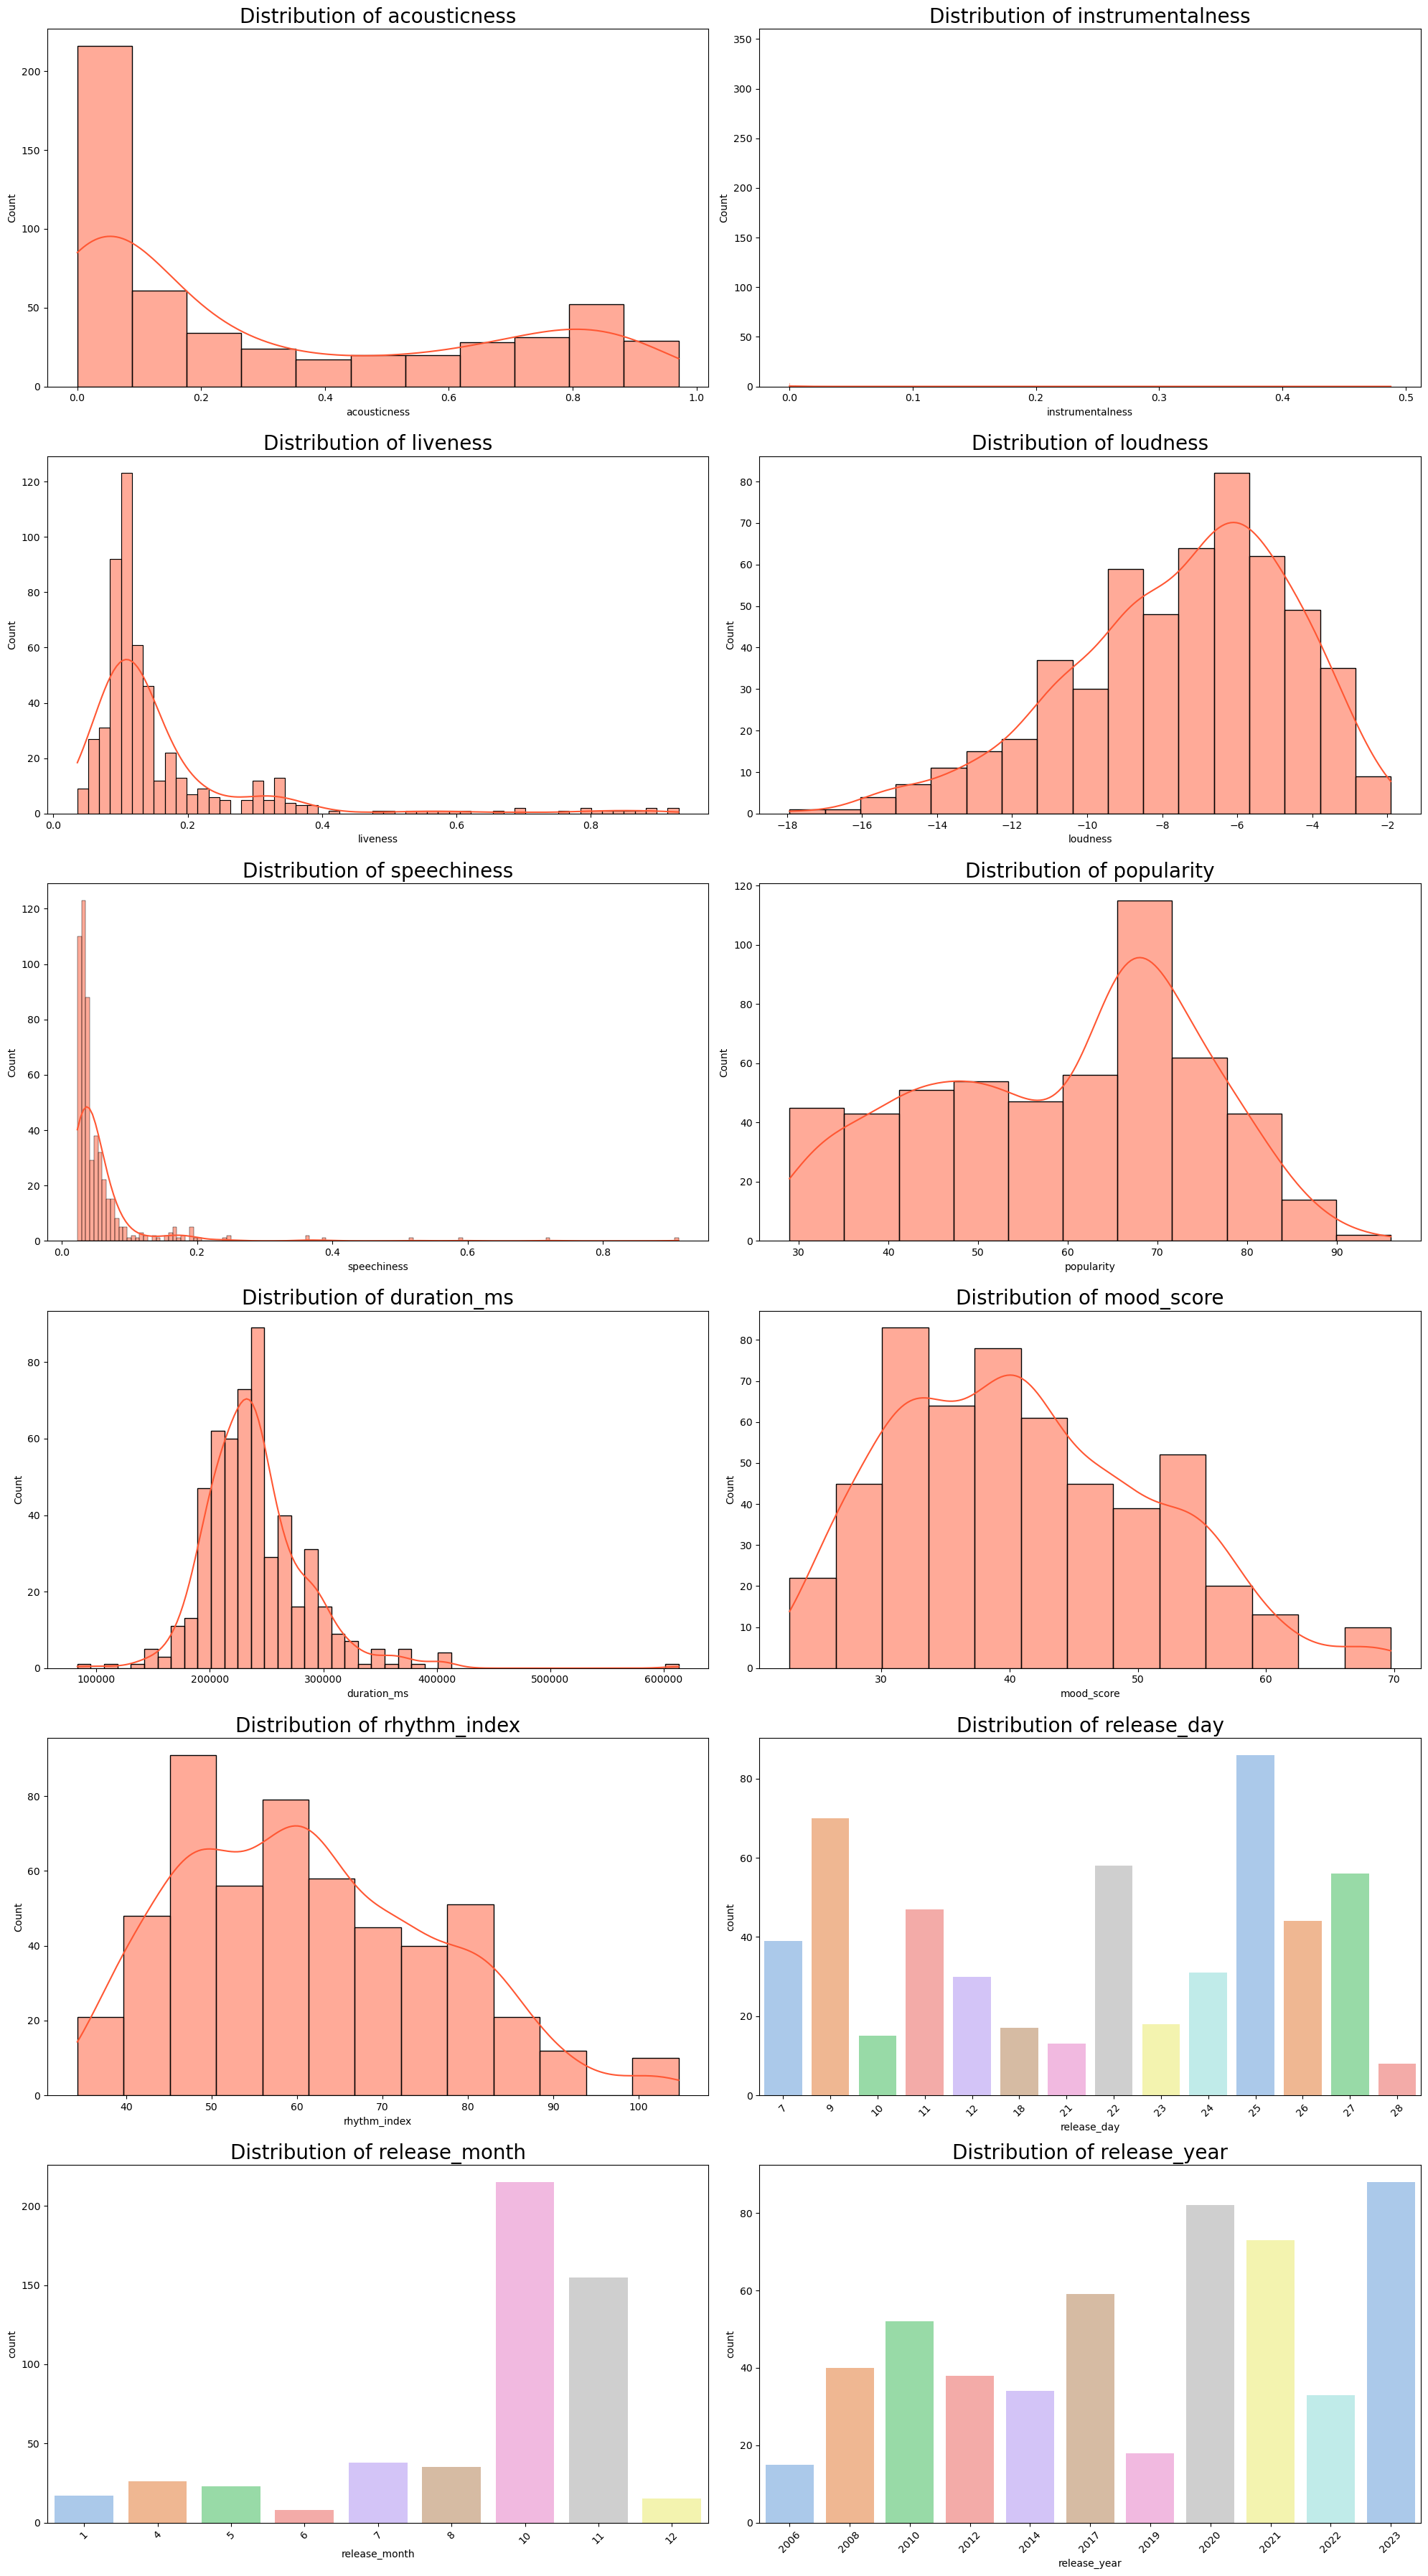

In [14]:
# Continuous features
continuous_features = ['acousticness', 'instrumentalness', 'liveness', 'loudness', 
                       'speechiness', 'popularity', 'duration_ms', 'mood_score', 'rhythm_index']

# Categorical features
categorical_features = ['release_day', 'release_month', 'release_year']

# Calculate number of rows needed for two columns
total_plots = len(continuous_features) + len(categorical_features)
num_rows = total_plots // 2 + total_plots % 2

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plotting histograms for continuous features
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], ax=axes[i], color='#FF5733', kde=True)  # kde=True adds a density curve
    axes[i].set_title(f'Distribution of {feature}',fontsize=20)
    axes[i].set_xlabel(feature)

# Plotting count plots for categorical features
# Start from where continuous features plotting ended
for j, feature in enumerate(categorical_features, start=i+1):
    sns.countplot(x=df[feature], ax=axes[j], palette='pastel')
    axes[j].set_title(f'Distribution of {feature}',fontsize=20)
    axes[j].set_xlabel(feature)
    axes[j].tick_params(axis='x', rotation=45)  # Rotate x-ticks for better readability

# Hide any unused axes if the number of plots is odd
if total_plots % 2:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

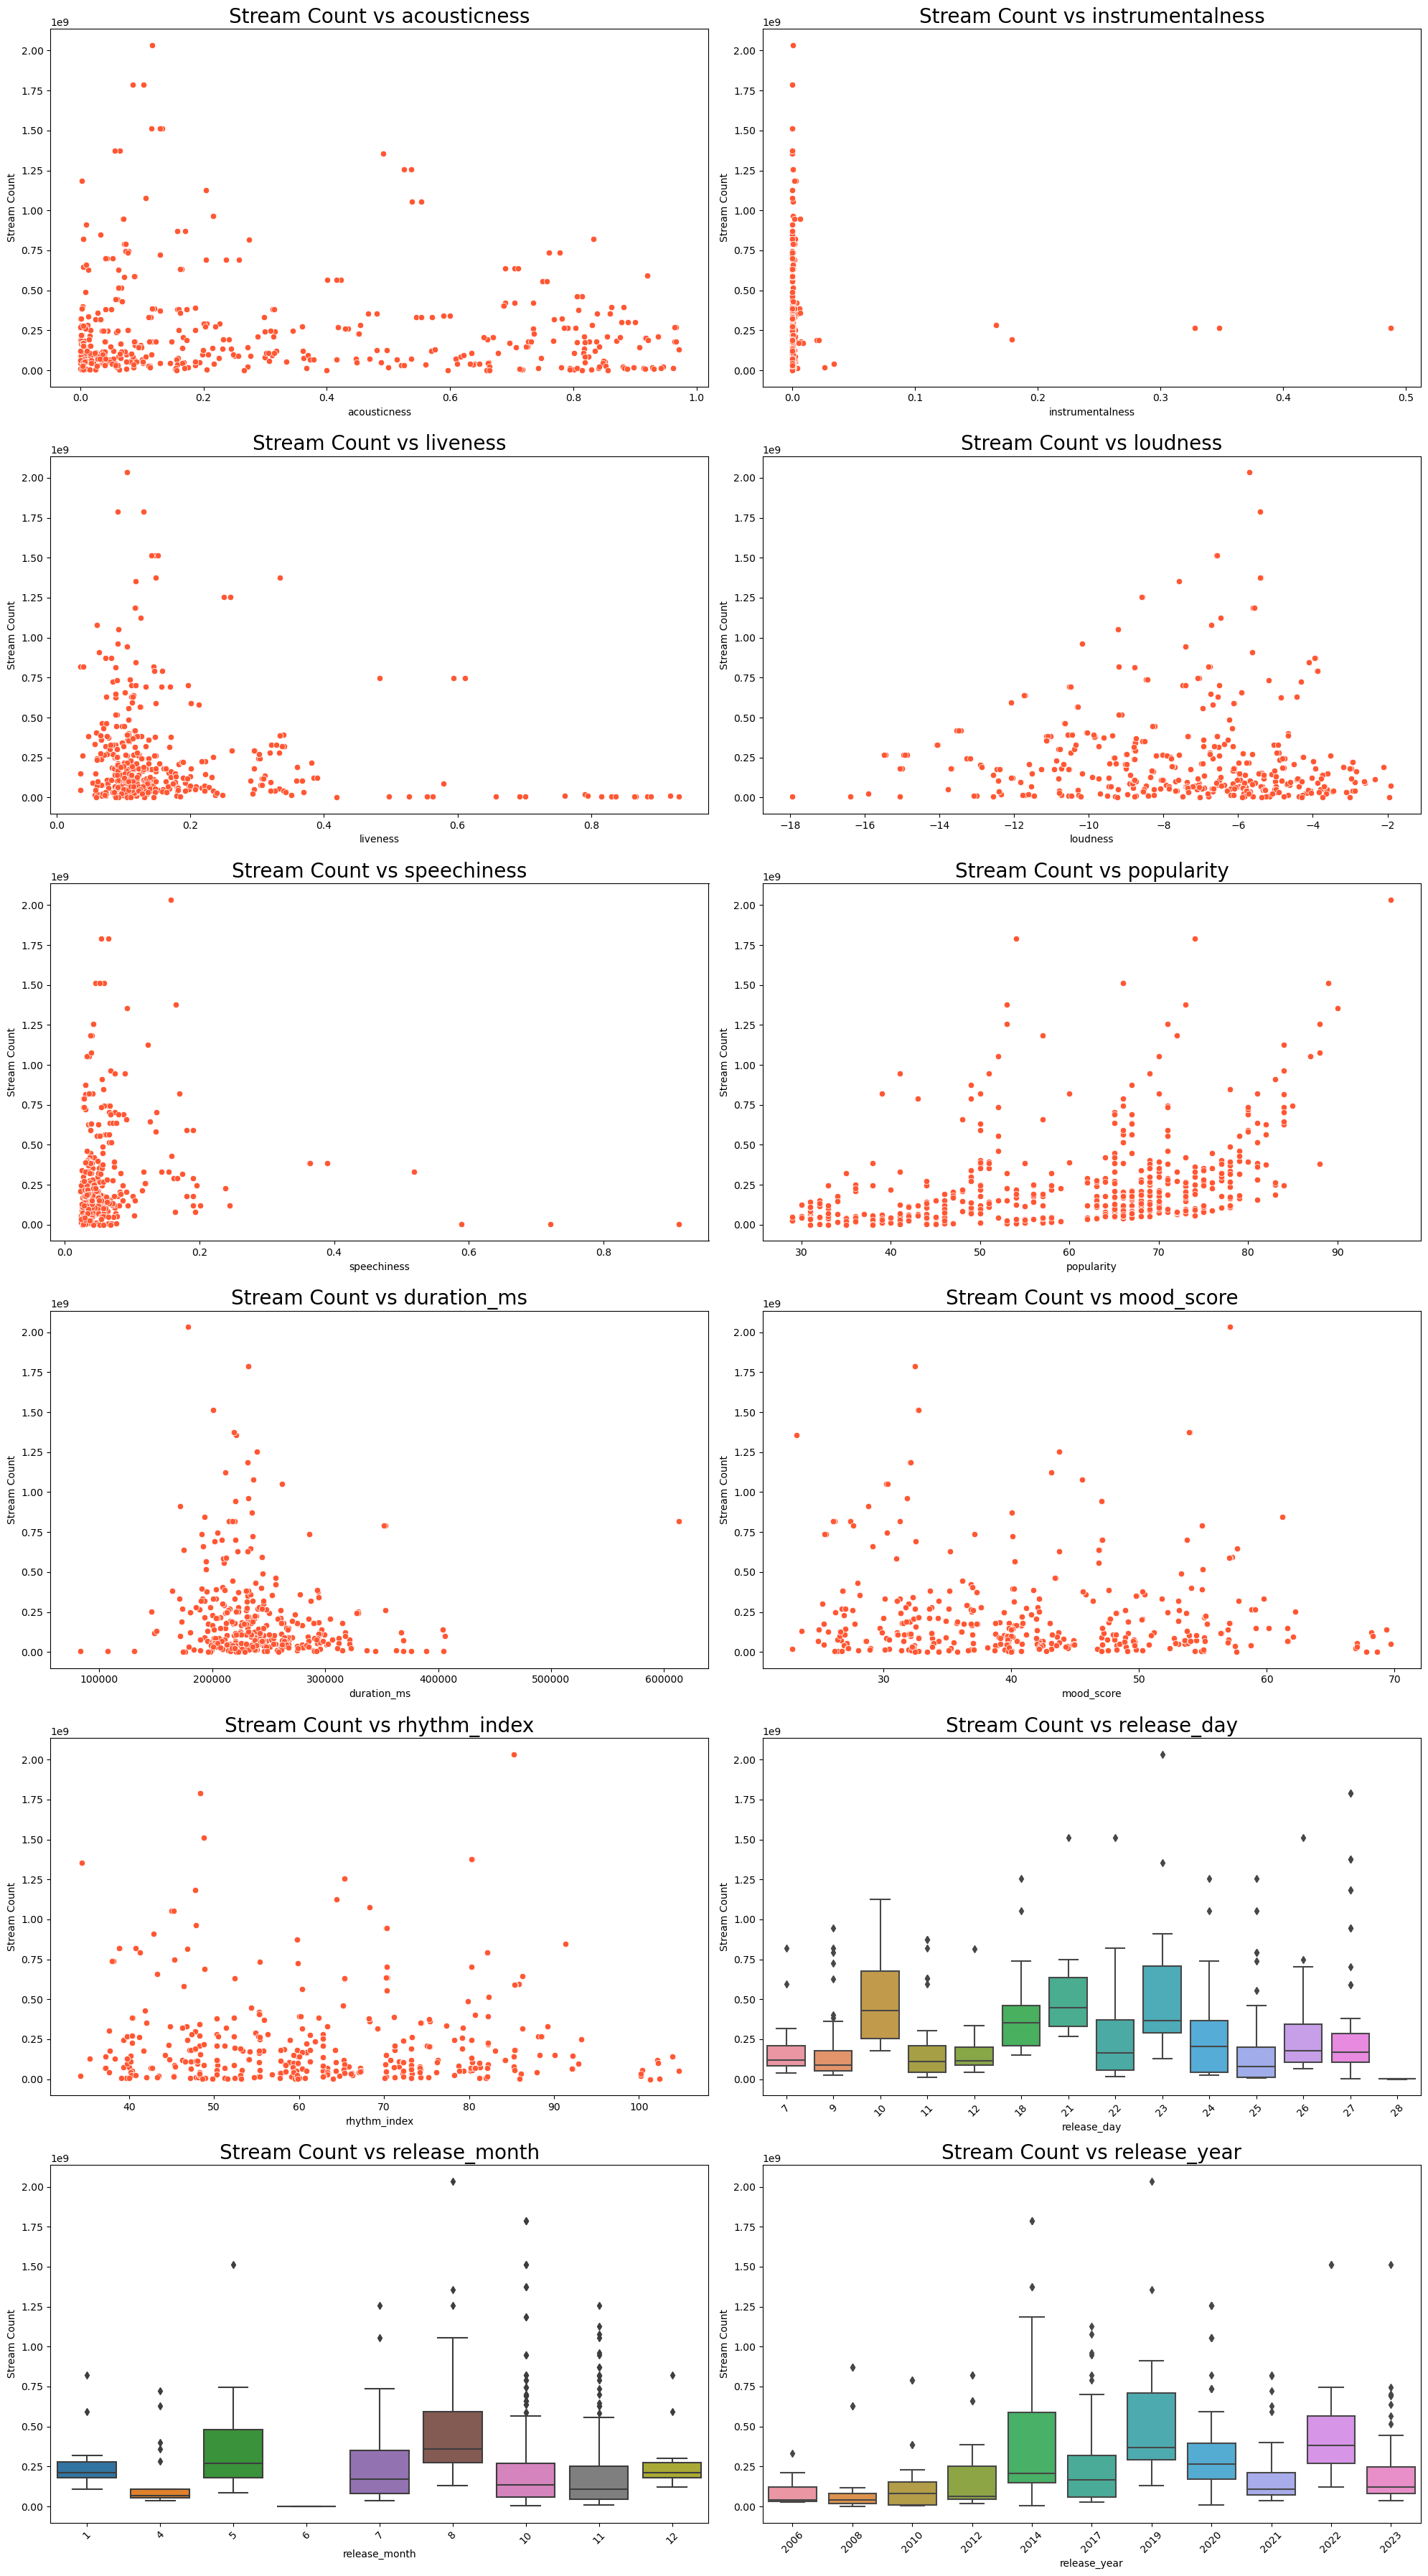

In [15]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plotting scatter plots for continuous features against stream count
for i, feature in enumerate(continuous_features):
    sns.scatterplot(x=df[feature], y=df['stream_count'], ax=axes[i],color='#FF5733')
    axes[i].set_title(f'Stream Count vs {feature}', fontsize=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Stream Count')

# Plotting box plots for categorical features against stream count
# Start from where continuous features plotting ended
for j, feature in enumerate(categorical_features, start=i+1):
    sns.boxplot(x=df[feature], y=df['stream_count'], ax=axes[j])
    axes[j].set_title(f'Stream Count vs {feature}', fontsize=20)
    axes[j].set_xlabel(feature)
    axes[j].set_ylabel('Stream Count')
    axes[j].tick_params(axis='x', rotation=45)  # Rotate x-ticks for better readability

# Hide any unused axes if the number of plots is odd
if total_plots % 2:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

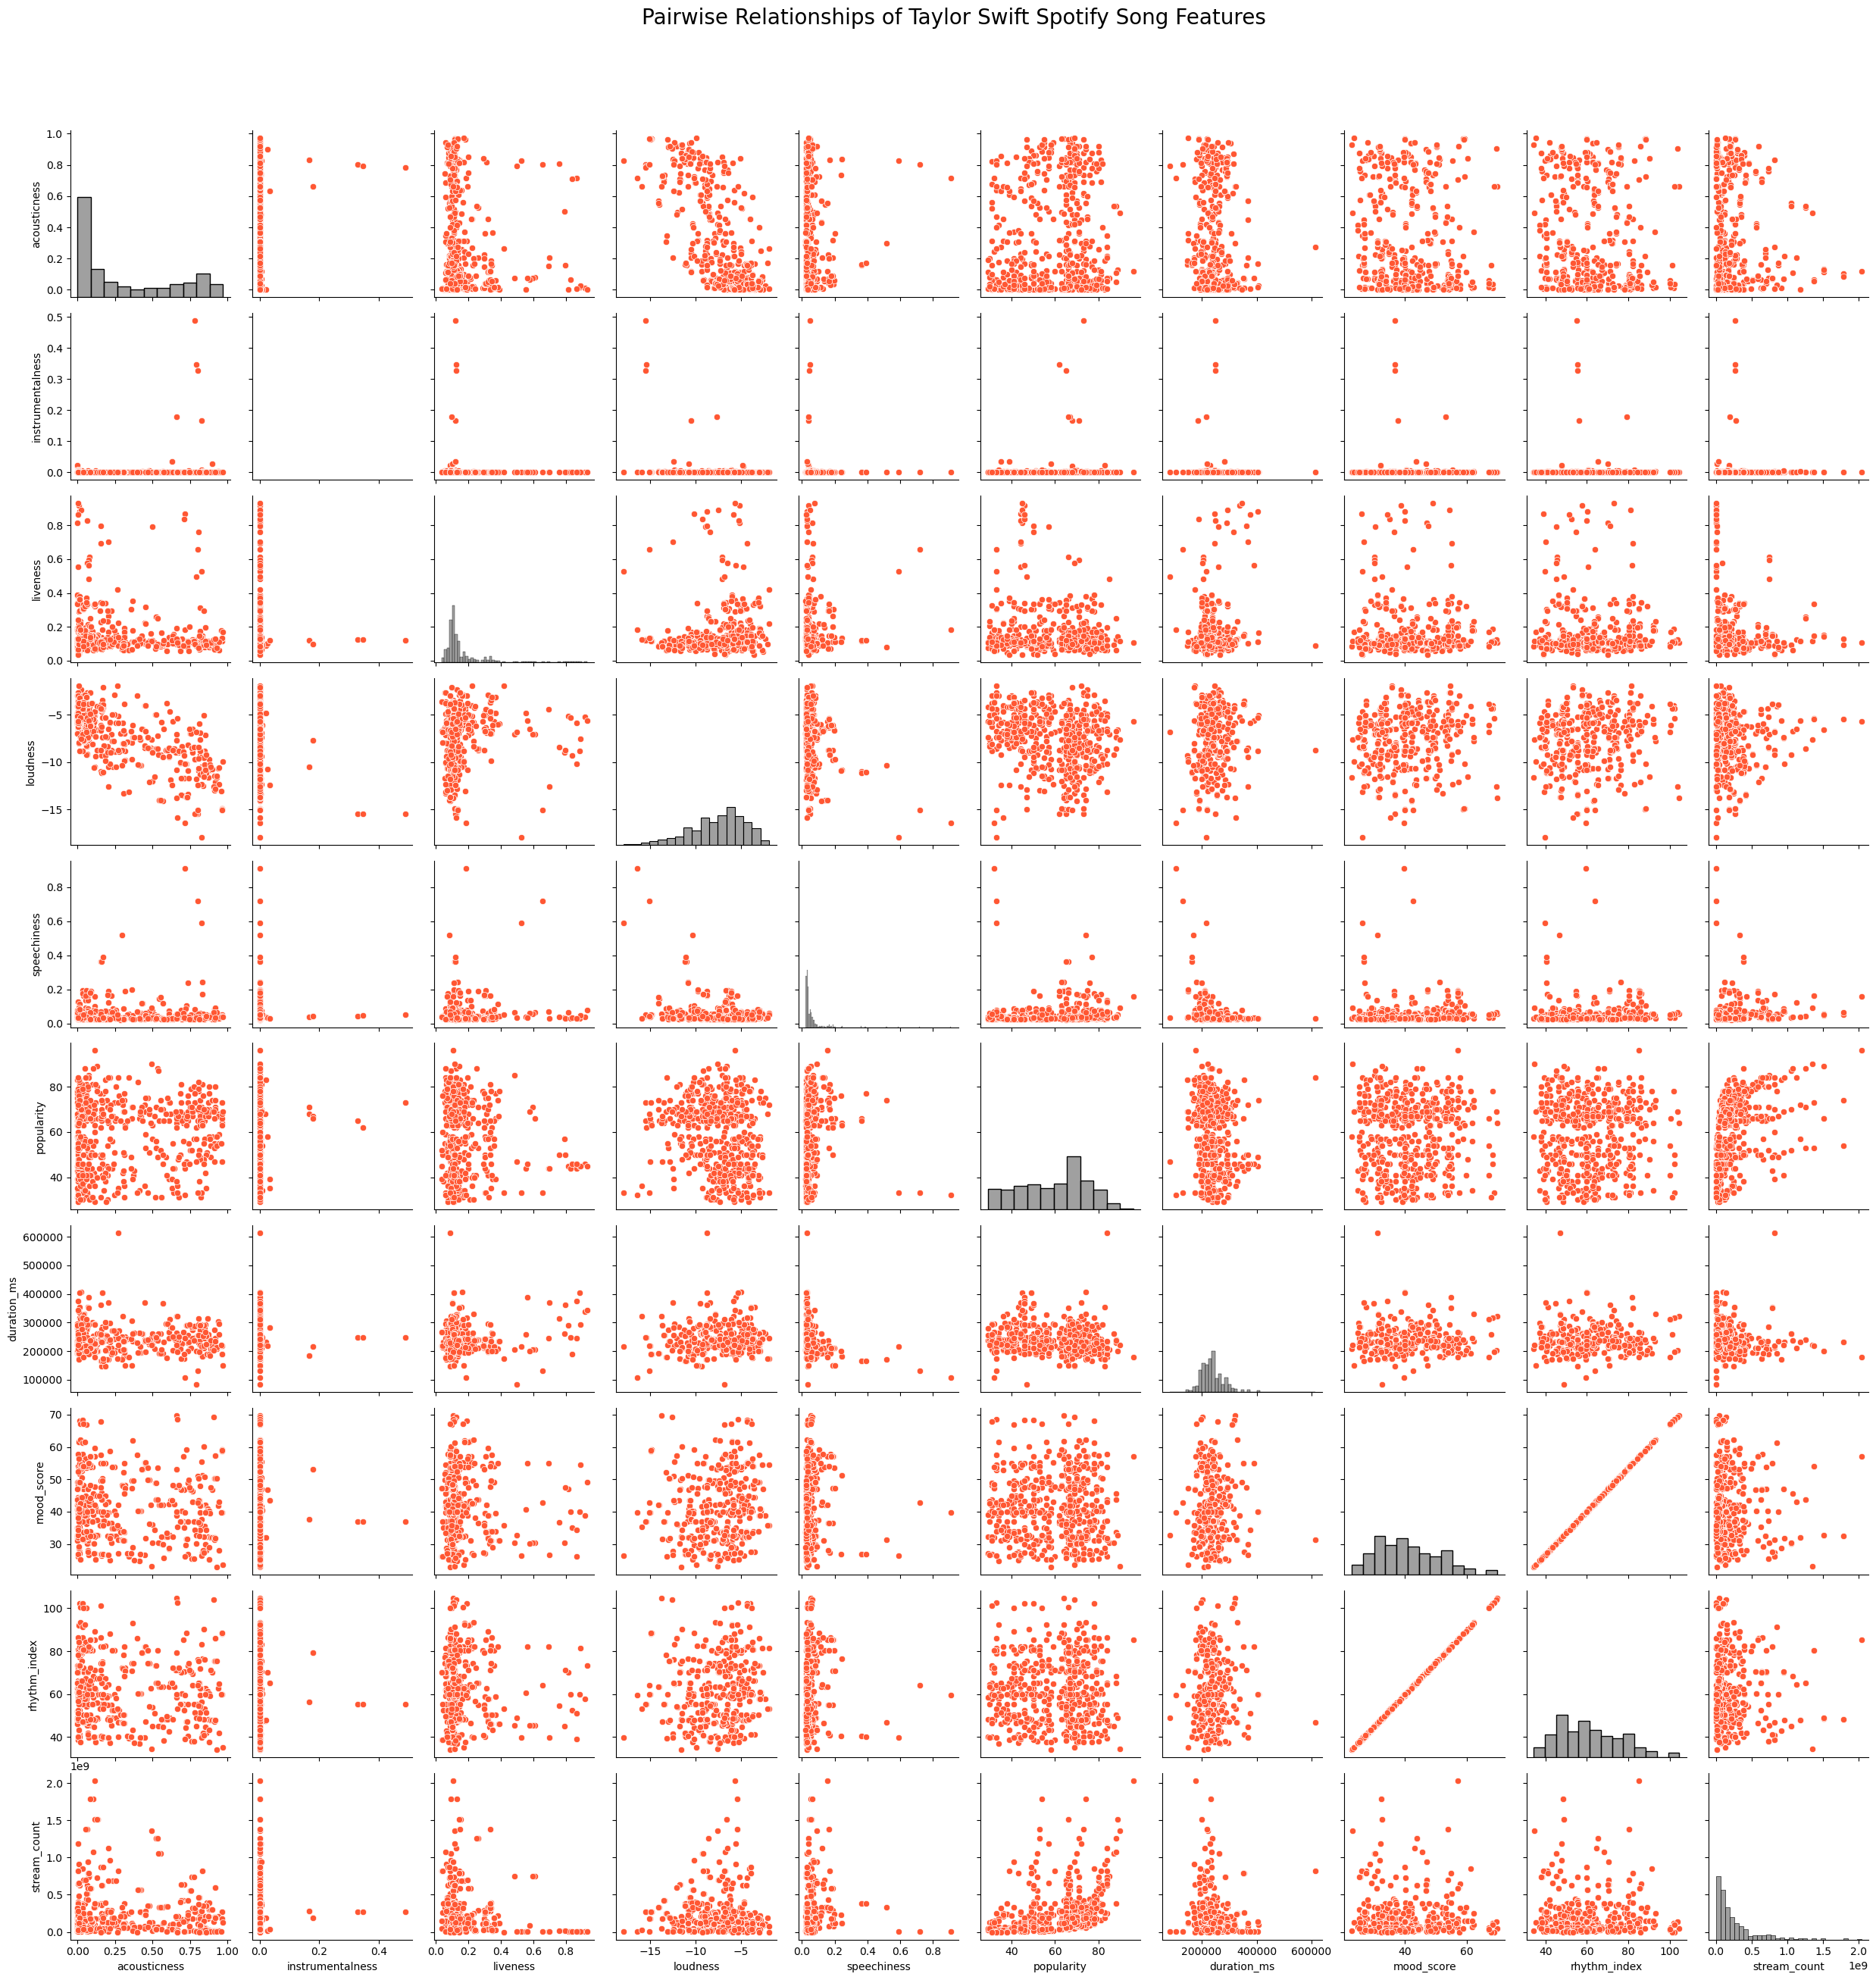

In [16]:
selected_features = continuous_features + ['stream_count']

# Create a PairGrid instance
g = sns.PairGrid(df[selected_features])

# Define colors
hist_color = 'grey'  # Color for histograms
scatter_color = '#FF5733'  # Color for scatter plots

# Map histograms to the diagonal with specified color
g.map_diag(sns.histplot, color=hist_color, kde=False)

# Map scatter plots to the off-diagonal with specified color
g.map_offdiag(sns.scatterplot, color=scatter_color)

# Set the overall title for the PairGrid
plt.suptitle('Pairwise Relationships of Taylor Swift Spotify Song Features', size=20, y=1.05)

# Show the plot
plt.show()

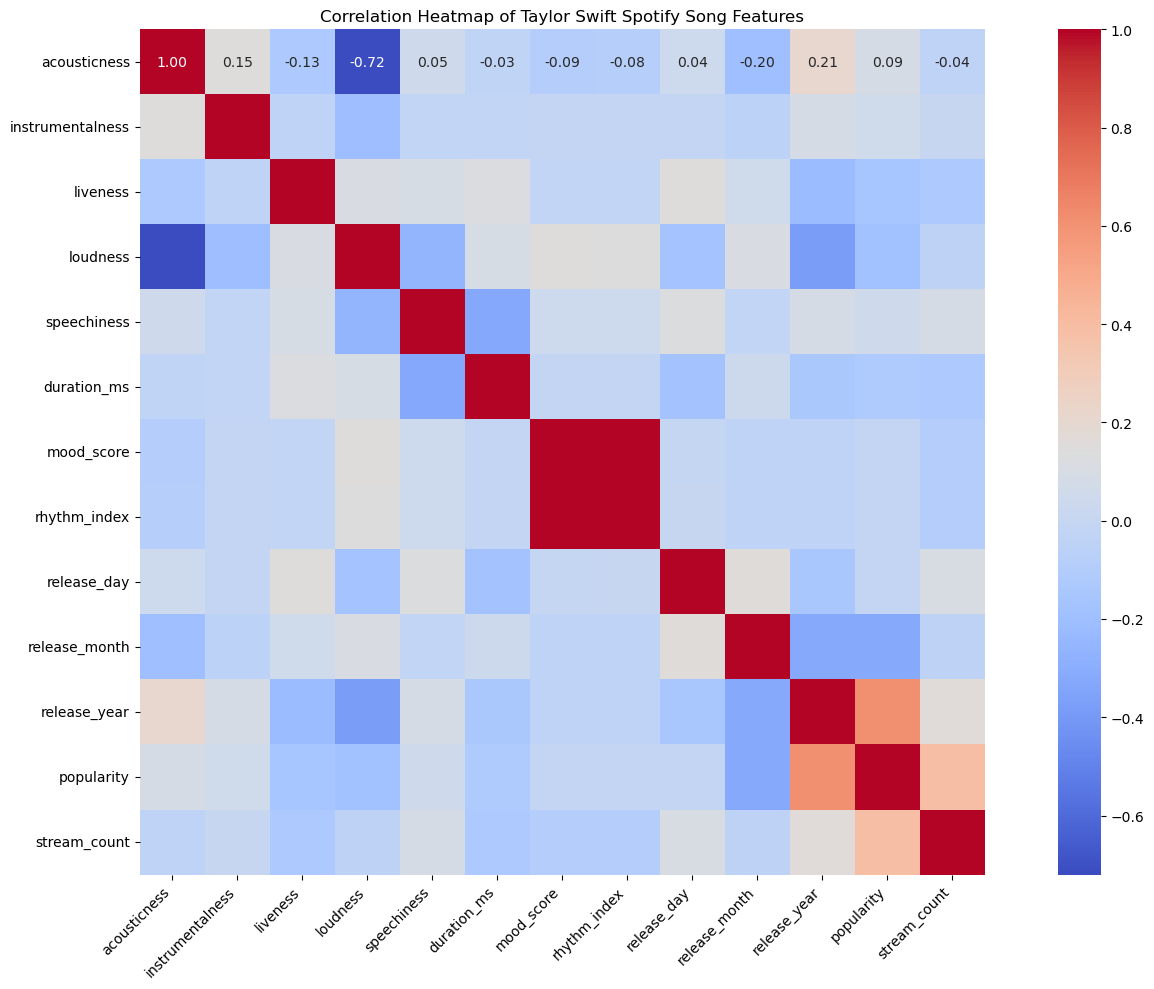

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Taylor Swift Spotify Song Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Dropping irrelevant elements
Based on the analysis, it appears that `instrumentalness` does not correlate with `stream_count`. To avoid adding unnecessary noise to the data, we will remove this feature. While other features also show low correlations, removing all of them would leave us with insufficient data to analyze. These features still contribute to the factors we are investigating, so we will retain them to ensure a comprehensive solution.

In [18]:
df.drop(columns=['instrumentalness'], inplace=True)

df.head()

,acousticness,liveness,loudness,speechiness,duration_ms,mood_score,rhythm_index,release_day,release_month,release_year,popularity,stream_count
0,0.009420,0.3670,-4.840,0.0327,212600,39.431000,58.8775,27,10,2023,66,104819286
1,0.009610,0.3670,-4.830,0.0312,212600,39.420333,58.8705,26,10,2023,77,104819286
2,0.088500,0.1680,-5.376,0.0670,231833,32.497000,48.3950,27,10,2023,67,155996658
3,0.097600,0.1740,-5.417,0.0641,231833,32.497333,48.3745,26,10,2023,81,155996658
4,0.000421,0.0899,-4.785,0.0397,231000,31.998333,47.6895,27,10,2023,68,188126672


# Machine Learning

### 1. Random Forest Regressor
Random Forest is chosen for predictive tasks because it reduces the risk of overfitting by averaging out the biases of individual decision trees. It is robust against noise and capable of working with non-linear data.

$$
\text{Random Forest Prediction} = \frac{1}{N} \sum_{i=1}^{N} \text{Prediction of Tree}_i
$$
In the Random Forest prediction formula:

- \( N \) represents the total number of trees in the Random Forest.
- \( i \) represents each individual tree within the Random Forest, ranging from \( 1 \) to \( N \).
- Prediction of Tree $i$ denotes the prediction made by the $i^{th}$ tree in the Random Forest.


1. **Feature Selection and Target Definition:**
   - Features (`X`) are the variables we use to predict the target.
   - The target (`y`) is the outcome we want to predict.

2. **Data Splitting:**
   - The dataset is divided into a training set to build the model and a testing set to evaluate its performance.

3. **Model Initialization:**
   - A Random Forest model is initiated with specified parameters, such as the number of decision trees in the forest.

4. **Model Training:**
   - The training set is used to build a forest of decision trees, where each tree is trained on a random subset of the data.

5. **Prediction:**
   - The model uses the trained forest to make predictions on new, unseen data (the testing set).

6. **Performance Evaluation:**
   - RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) are metrics that quantify the prediction error of the model.

7. **Feature Importance Assessment:**
   - The model assesses which features have the most impact on the target prediction, helping in understanding the driving factors.

Random Forest combines the output of multiple decision trees to produce a single consensus prediction. Each tree is created from a random sample of the data, and the final prediction is typically the average of all trees for regression tasks. This process helps in achieving higher accuracy and a more generalizable model.

In [19]:
# Define features (X) and target variable (y)
X = df.drop(['stream_count'], axis=1)
y = df['stream_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with some hyperparameters
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Root Mean Squared Error (RMSE): 219696209.46257487
Mean Absolute Error (MAE): 148149921.77514333
Total Actual Stream Counts (Test Set): 25848659890
Total Predicted Stream Counts (Train Set): 29416521011.254333
Error Ratio: -0.13802886248020238


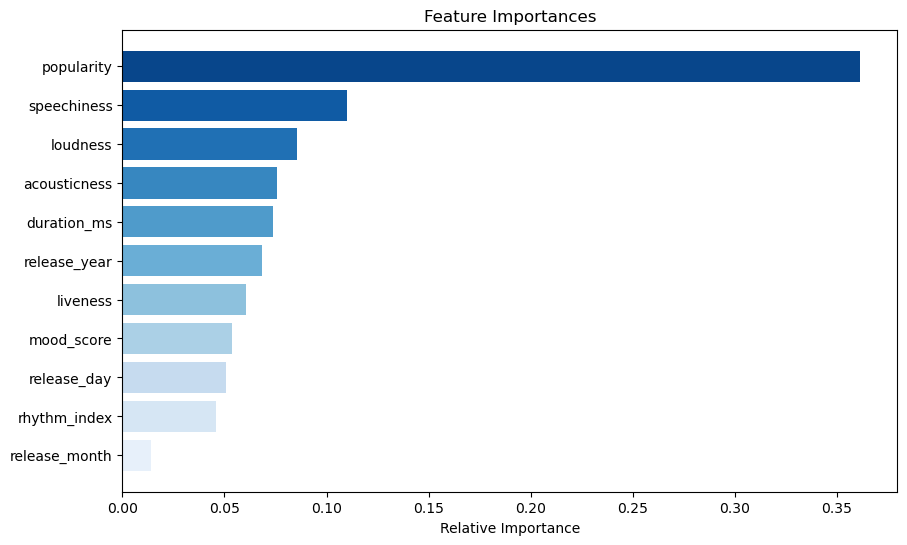

In [20]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the performance metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)

# Calculate the total sums
total_actual_test = np.sum(y_test)
total_pred_test = np.sum(y_pred)
rf_error_ratio = (total_actual_test - total_pred_test) / total_actual_test

# Print performance metrics
print(f'Root Mean Squared Error (RMSE): {rf_rmse}')
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f"Total Actual Stream Counts (Test Set): {total_actual_test}")
print(f"Total Predicted Stream Counts (Train Set): {total_pred_test}")
print(f'Error Ratio: {rf_error_ratio}')

# Feature importance visualization
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

palette = sns.color_palette("Blues", len(indices))  # 'Blues' is Blue color palette

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=palette, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### 2. XGBoost Regressor Model

XGBoost stands out for predictive tasks because it uses gradient boosting frameworks to push the limits of computing power and accuracy. Its ability to handle sparse data and compute on-the-fly (tree pruning) makes it effective against overfitting and optimizes computational resources.

$$
\text{XGBoost Prediction} = \sum_{k=1}^{K} \text{Prediction of Base Learner}_k
$$

In the XGBoost prediction formula:

- \( K \) represents the total number of base learners (typically decision trees) in the model.
- \( k \) refers to each individual base learner within the model, ranging from \( 1 \) to \( K \).
- Prediction of Base Learner $k$ denotes the prediction made by the $k^{th}$ learner in the ensemble.

1. **Feature Selection and Target Definition:**
   - Features (`X`) are the input variables used to predict the target.
   - The target (`y`) is the dependent variable or outcome that the model aims to predict.

2. **Data Splitting:**
   - The data is partitioned into training and testing sets to train the model and validate its performance, respectively.

3. **Model Initialization:**
   - An XGBoost model is initialized with specific parameters, such as the number of base learners and the objective function (reg:linear for regression tasks).

4. **Model Training:**
   - The model learns from the training data by iteratively improving upon the residuals of the previous learners, reducing errors using gradient descent.

5. **Prediction:**
   - Once trained, the model makes predictions on the test set by summing the outputs of all the trained base learners.

6. **Performance Evaluation:**
   - Metrics like RMSE (Root Mean Squared Error) gauge the model’s prediction accuracy by measuring the average magnitude of the errors between predicted and actual values.

7. **Feature Importance and Model Tuning:**
   - XGBoost evaluates the contribution of each feature to the model’s predictions, allowing for further tuning and optimization to improve performance.

XGBoost combines the predictions from multiple base learners, where each learner corrects the errors of its predecessors, thus refining predictions iteratively. This method offers a robust approach to handle different types of regression problems, improving accuracy and preventing overfitting through regularization and tree pruning strategies.

Root Mean Squared Error (RMSE): 205128451.23057792
Mean Absolute Error (MAE): 138096124.0584112
Total Actual Stream Counts (Test Set): 25848659890
Total Predicted Stream Counts (Train Set): 26913894400.0
Error Ratio: -0.041210434681455355


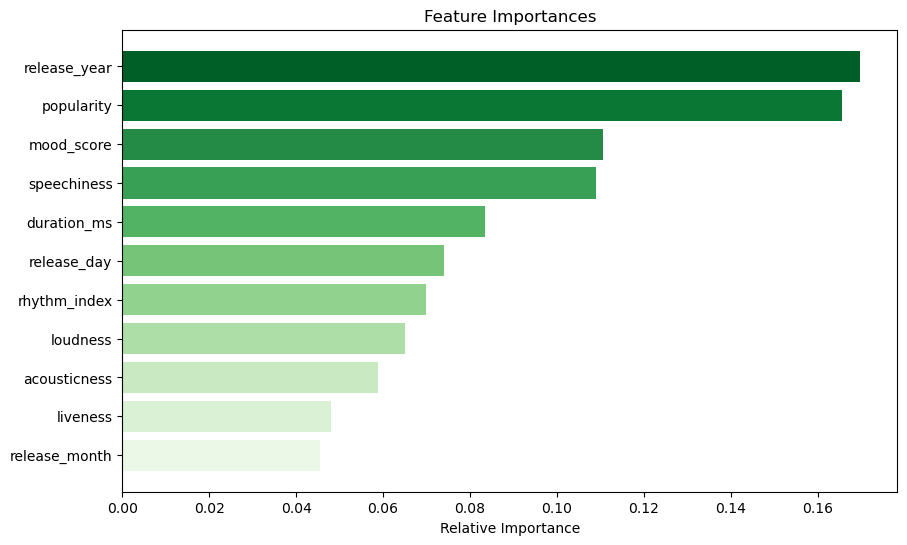

In [21]:
# Initialize and fit the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_mae = mean_absolute_error(y_test, y_pred)

# Calculate the total sums
total_actual_test = y_test.sum()
total_pred_test = y_pred.sum()
xgb_error_ratio = (total_actual_test - total_pred_test) / total_actual_test

# Print performance metrics
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')
print(f'Mean Absolute Error (MAE): {xgb_mae}')
print(f'Total Actual Stream Counts (Test Set): {total_actual_test}')
print(f'Total Predicted Stream Counts (Train Set): {total_pred_test}')
print(f'Error Ratio: {xgb_error_ratio}')


# Get feature importances
importances = model.feature_importances_
# Get the feature names
feature_names = X_train.columns
# Sort the feature importances by value
sorted_indices = np.argsort(importances)[::-1]


palette = sns.color_palette("Greens_r", len(indices))  # 'Green_r' is reversed Green color palette

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Create a horizontal bar chart of feature importance
ax.barh(range(len(sorted_indices)), importances[sorted_indices],color=palette, align='center')
# Set the y-ticks to be the feature names
ax.set_yticks(range(len(sorted_indices)))
ax.set_yticklabels(feature_names[sorted_indices])
# Invert the view of the y-axis so that the highest importance is at the top
ax.invert_yaxis()
ax.set_xlabel('Relative Importance')
ax.set_title('Feature Importances')
plt.show()

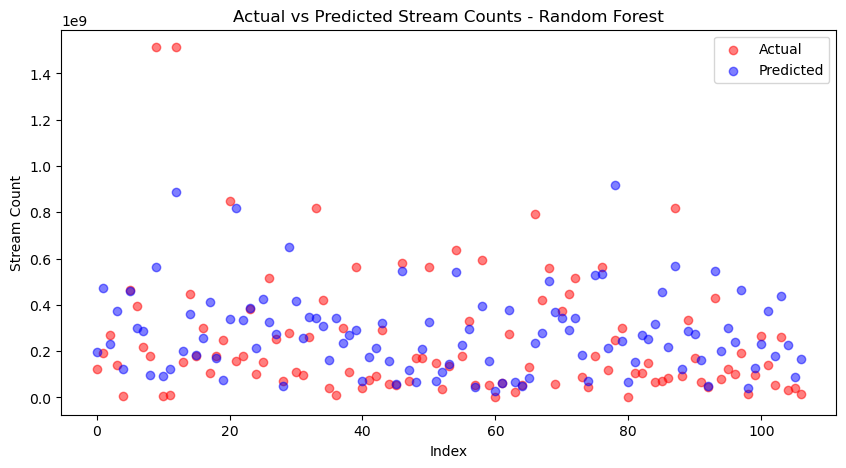

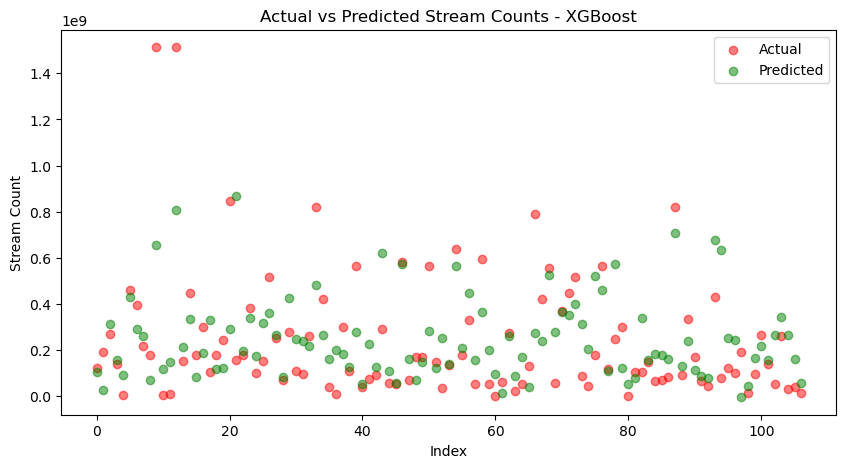

Total Actual Stream Counts (Test Set): 25848659890
Total Predicted Stream Counts by RandomForest: 29416521011.254333
Total Predicted Stream Counts by XGBoost: 26913894400.0


In [22]:
# Function to plot actual vs predicted values for a specific model
def plot_predictions(y_test, y_pred, model_name, pred_color):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.5)
    plt.scatter(range(len(y_pred)), y_pred, color=pred_color, label='Predicted', alpha=0.5)
    plt.title(f'Actual vs Predicted Stream Counts - {model_name}')
    plt.xlabel('Index')
    plt.ylabel('Stream Count')
    plt.legend()
    plt.show()

# Plotting for RandomForest with actual values
plot_predictions(y_test, rf.predict(X_test), 'Random Forest', 'blue')

# Plotting for XGBoost with actual values
plot_predictions(y_test, model.predict(X_test), 'XGBoost', 'green')

# Comparison of total actual vs predicted stream counts
def print_summary(y_test, y_pred_rf, y_pred_xgb):
    total_actual = y_test.sum()
    total_pred_rf = y_pred_rf.sum()
    total_pred_xgb = y_pred_xgb.sum()
    print(f'Total Actual Stream Counts (Test Set): {total_actual}')
    print(f'Total Predicted Stream Counts by RandomForest: {total_pred_rf}')
    print(f'Total Predicted Stream Counts by XGBoost: {total_pred_xgb}')

print_summary(y_test, rf.predict(X_test), model.predict(X_test))


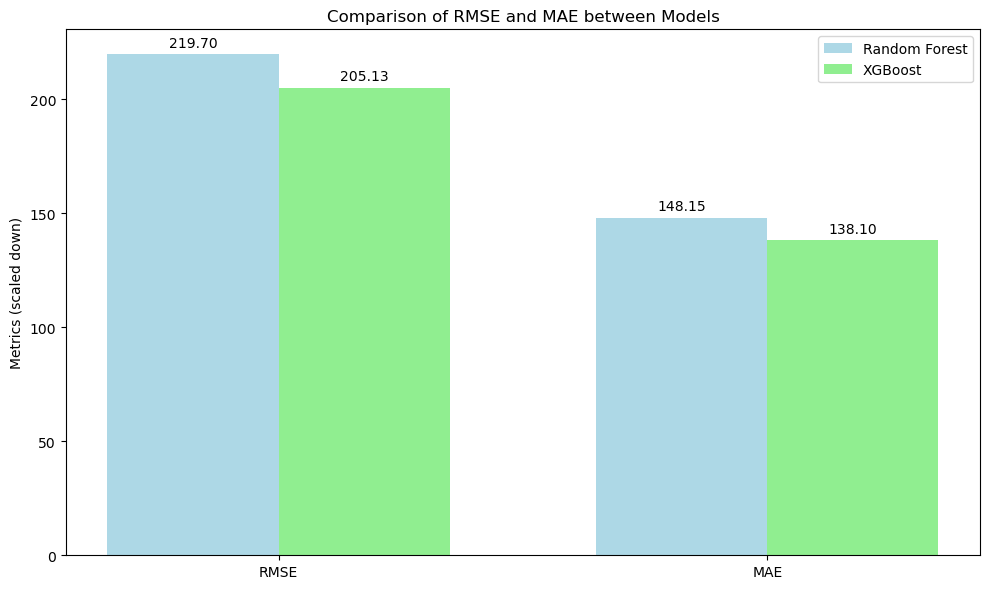

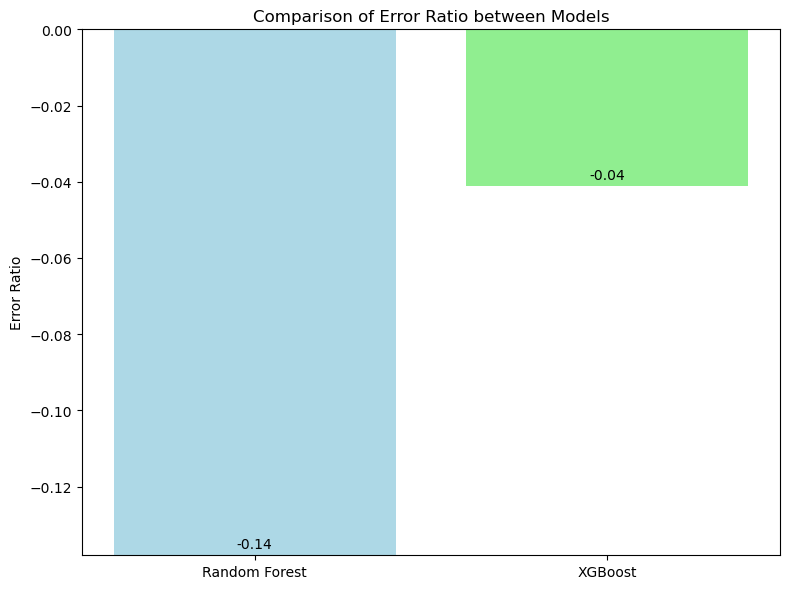

In [23]:
labels = ['RMSE', 'MAE']

# Data to plot
rf_metrics = [rf_rmse, rf_mae]
xgb_metrics = [xgb_rmse, xgb_mae]

# Convert to a smaller scale if numbers are too large for RMSE and MAE
rf_metrics_scaled = [x / 1e6 for x in rf_metrics]  # Scale down by 1e6
xgb_metrics_scaled = [x / 1e6 for x in xgb_metrics]  # Scale down by 1e6

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the bar chart for RMSE and MAE
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rf_metrics_scaled, width, label='Random Forest',color = '#add8e6')
rects2 = ax.bar(x + width/2, xgb_metrics_scaled, width, label='XGBoost', color = '#90ee90')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics (scaled down)')
ax.set_title('Comparison of RMSE and MAE between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to automatically label the bars with their respective values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Error Ratios for both models, offsetting by adding 1 to move the negative values to positive space
rf_error_ratio_offset = rf_error_ratio + 1
xgb_error_ratio_offset = xgb_error_ratio + 1


# Data to plot for Error Ratios
error_ratios = [rf_error_ratio, xgb_error_ratio]

# Create the bar chart for Error Ratios
fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(['Random Forest', 'XGBoost'], error_ratios, color=['#add8e6', '#90ee90'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error Ratio')
ax.set_title('Comparison of Error Ratio between Models')
ax.set_ylim(min(error_ratios), 0)  # Adjust the y-axis limits to start from the top

# Function to automatically label the bars with their respective values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()

plt.show()

# Model Comparison
`Random Forest` exhibits a **higher Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)**, as well as a greater error ratio in comparison to XGBoost. 

Concretely, this translates to `XGBoost` having a more precise forecasting ability for the stream counts, with lower deviation from the actual values. These findings underscore the effectiveness of `XGBoost` over `Random Forest` in this context, indicating that `XGBoost` is the superior model for predicting stream counts with greater accuracy and reliability.

# Recommendation

1. **Feature Engineering**: Consider creating additional features or refining existing ones to better capture the underlying patterns in the data. You can experiment with different transformations, aggregations, or combinations of features to enhance the predictive power of your model.

2. **Hyperparameter Tuning**: Fine-tune the hyperparameters of your machine learning models, such as the number of trees in the Random Forest or the learning rate in XGBoost. Use techniques like grid search or random search to systematically explore the hyperparameter space and identify the optimal settings for your models.

3. **Ensemble Methods**: Explore ensemble learning techniques to combine the predictions of multiple models. For example, you can create a meta-learner that aggregates the predictions of both Random Forest and XGBoost models to potentially improve overall performance.

4. **Model Stacking**: Implement model stacking, where the predictions of multiple base models are used as input features for a higher-level model. This approach can capture complementary patterns in the data and improve prediction accuracy.

5. **Cross-Validation**: Ensure robustness and generalization by performing cross-validation to assess the stability and reliability of your models. Cross-validation helps estimate the performance of your models on unseen data and can guide model selection and evaluation.

6. **Feature Selection**: Conduct feature selection to identify the most relevant features for predicting stream counts. Eliminate redundant or less informative features that may introduce noise or overfitting into your models.

By incorporating these recommendations into your analysis, we can further refine the predictive models and uncover valuable insights into Taylor Swift's Spotify stream counts.